In [1]:
import cv2
from keras.models import load_model
from keras.preprocessing.image import load_img,img_to_array
import numpy as np
import os
import numpy as np
import pandas as pd
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential,load_model
from keras.layers import Conv2D,MaxPooling2D,SpatialDropout2D,Flatten,Dropout,Dense,LeakyReLU
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

C:\Users\MASTER\anaconda3\envs\myenv\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
model=load_model('my_model10')

In [3]:
import cv2
import numpy as np
size=100
sizes=(size,size)
array_img=[]

path=["C:/Users/MASTER/Documents/Maskdetect/mask.png","C:/Users/MASTER/Documents/Maskdetect/mas.png","C:/Users/MASTER/Documents/Maskdetect/ma.png","C:/Users/MASTER/Documents/Maskdetect/m.png"]
for i in range(len(path)):
    img=cv2.imread(path[i])
    img=cv2.resize(img,sizes)
    mask=np.array(img)
    mask=mask.astype("float32")
    mask/=255
    mask=np.reshape(mask,(1,size,size,3))
    array_img.append(mask)

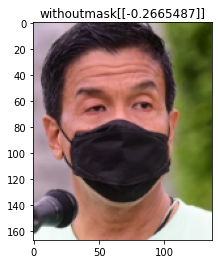

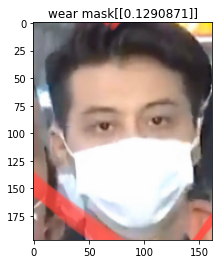

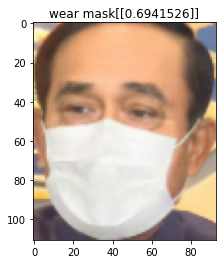

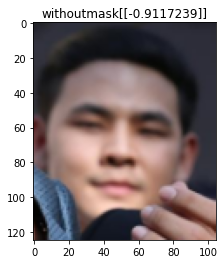

In [4]:
for i in range(len(array_img)):
    prediction=model.predict(array_img[i])
    img=image.load_img(path[i])

    if (prediction)>0:
        result="wear mask"+str(prediction)
    else:
        result="withoutmask"+str(prediction)
    plt.figure()
    plt.title(result)
    
    plt.imshow(img)


In [5]:
import cv2
from keras.models import load_model
from keras.preprocessing.image import load_img , img_to_array
from keras.applications.mobilenet_v2 import preprocess_input
import numpy as np
import os



In [6]:
face_classifier=cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
mask_text="Wear mask"
nomask_text="No mask"
font=cv2.FONT_HERSHEY_SIMPLEX
scale=0.5

In [7]:
def predict(img):
    face_frame=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    face_frame=cv2.resize(face_frame,(size,size))
    face_frame= img_to_array(face_frame)
    face_frame= np.expand_dims(face_frame,axis=0)
    face_frame = preprocess_input(face_frame)
    prediction=model.predict(face_frame)
    return prediction[0][0]

In [8]:
def detector(gray_image,frame):
    face=face_classifier.detectMultiScale(gray_image,1.1,5)
    for (x,y,w,h) in face:
        color=frame[y:y+h,x:x+w]
        mask=predict(color)
        
        if mask >0:
            cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
            cv2.putText(frame,text=mask_text,org=(x+50,y-10),fontFace=font,fontScale=scale,color=(0,255,0),thickness=2)
        elif mask<=0:
            cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255),2)
            cv2.putText(frame,text=nomask_text,org=(x+50,y-10),fontFace=font,fontScale=scale,color=(0,0,255),thickness=2)
    return frame

In [9]:
video= cv2.VideoCapture(0)
while True:
    ret,frame=video.read()
    gray_frame=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # gray_frame=cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    detect=detector(gray_frame,frame)
    cv2.imshow("Video",detect)
    if cv2.waitKey(1) & 0xFF==ord("q"):
        break
video.release()
cv2.destroyAllWindow()

KeyboardInterrupt: 